Throughput Medio single run per Stream ID 1: 8.51 Mbps
Varianza per Stream ID 1: 0.01 Mbps^2


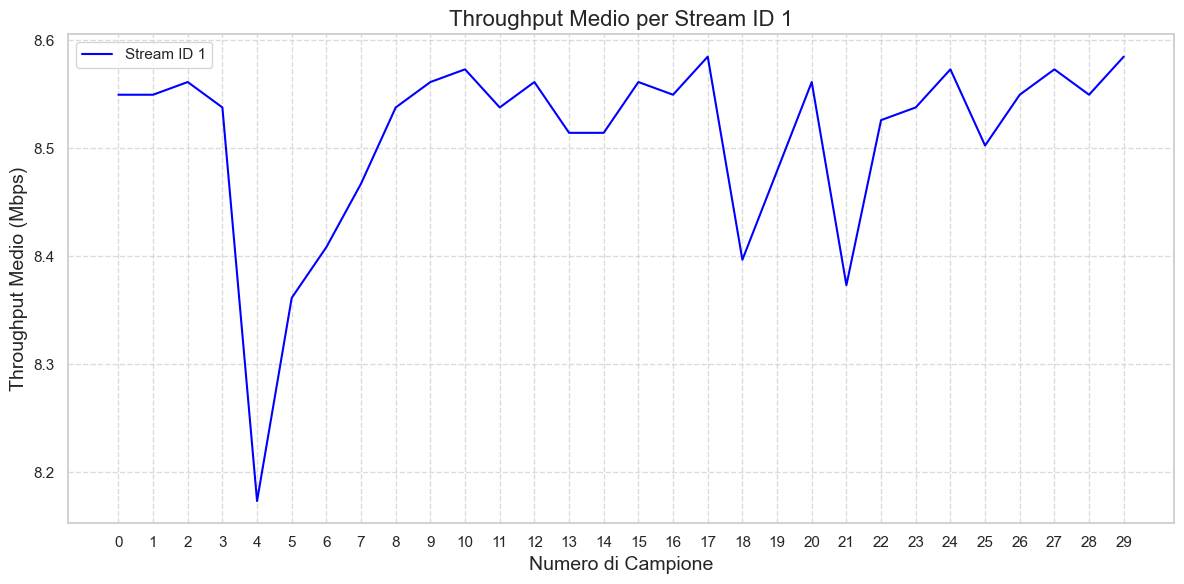

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Leggi il file CSV
data = pd.read_csv('Data59ghz_far/output10_10_1.csv', header=None)

# Rinomina le colonne per facilitare l'uso
data.columns = ['timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_id', 'time_interval',
                'bytes', 'bitrate', 'jitter', 'lost_packets', 'sent_packets', 'loss_percentage', 'errors']

# Converti il timestamp in un formato datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m%d%H%M%S')

# Filtra i dati per mantenere solo i campioni entro i 30 secondi
start_time = data['timestamp'].min()
start_time_1 = start_time + pd.Timedelta(seconds=20)
end_time = start_time + pd.Timedelta(seconds=50)
filtered_data = data[(data['timestamp'] >= start_time_1) & (data['timestamp'] < end_time)].copy()  # Usa .copy()

# Calcola il throughput in Mbps (Megabit per secondo)
filtered_data.loc[:, 'throughput_mbps'] = (filtered_data['bytes'] * 8) / 1_000_000

# Filtra i dati per stream ID 1 e 2
stream_id_1 = filtered_data[filtered_data['flow_id'] == 1]

# Calcola il throughput medio e la varianza per ciascun stream
throughput_avg_1 = stream_id_1['throughput_mbps'].mean()
throughput_var_1 = stream_id_1['throughput_mbps'].var()

# Stampa i risultati
print(f'Throughput Medio single run per Stream ID 1: {throughput_avg_1:.2f} Mbps')
print(f'Varianza per Stream ID 1: {throughput_var_1:.2f} Mbps^2')

# Calcola il throughput medio per ciascun stream
throughput_avg_1_grouped = stream_id_1.groupby(stream_id_1['timestamp'].dt.floor('s'))['throughput_mbps'].mean()

# Crea un indice numerico per il numero di campione
sample_indices_1 = range(len(throughput_avg_1_grouped))

# Plot del throughput medio per stream ID 1 (ho tolto marker='0' per omettere i punti)
plt.figure(figsize=(12, 6))
plt.plot(sample_indices_1, throughput_avg_1_grouped.values, linestyle='-', color='blue', markersize=8, label='Stream ID 1')
plt.title('Throughput Medio per Stream ID 1', fontsize=16)
plt.xlabel('Numero di Campione', fontsize=14)
plt.ylabel('Throughput Medio (Mbps)', fontsize=14)
plt.xticks(sample_indices_1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

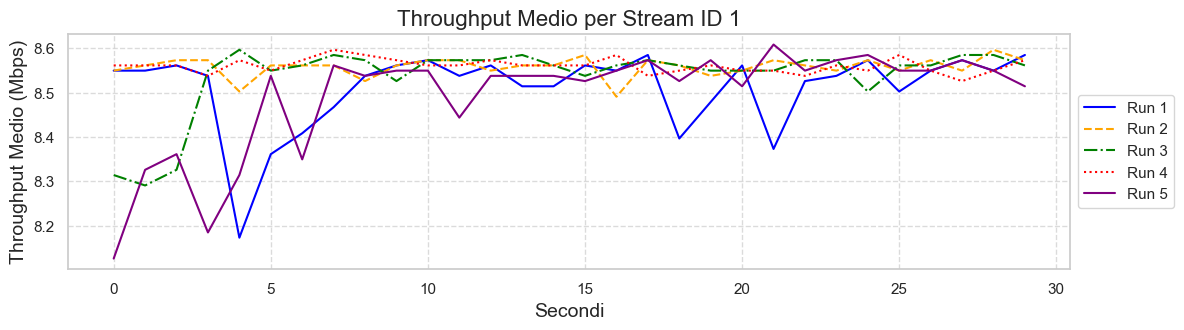

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Lista dei file CSV
csv_files = ['Data59ghz_far/output10_10_1.csv', 'Data59ghz_far/output10_10_2.csv', 'Data59ghz_far/output10_10_3.csv', 'Data59ghz_far/output10_10_4.csv', 'Data59ghz_far/output10_10_5.csv']

# Colori e stili di linea per i plot
colors = ['blue', 'orange', 'green', 'red', 'purple']
line_styles = ['-', '--', '-.', ':', '-']

# Inizializza liste per calcolare media e varianza
all_stream_id_1 = []
#all_stream_id_2 = []

# Leggi i file CSV, filtra e calcola il throughput
filtered_data_list = []
for file in csv_files:
    data = pd.read_csv(file, header=None)
    data.columns = ['timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_id', 'time_interval',
                'bytes', 'bitrate', 'jitter', 'lost_packets', 'sent_packets', 'loss_percentage', 'errors']
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m%d%H%M%S')
    data['throughput_mbps'] = (data['bytes'] * 8) / 1_000_000
    start_time = data['timestamp'].min()
    start_time_1 = start_time + pd.Timedelta(seconds=20)
    end_time = start_time + pd.Timedelta(seconds=50)
    filtered_data = data[(data['timestamp'] >= start_time_1) & (data['timestamp'] < end_time)].copy()  # Usa .copy()
    filtered_data_list.append(filtered_data)
    all_stream_id_1.append(filtered_data[filtered_data['flow_id'] == 1])
    #all_stream_id_2.append(filtered_data[filtered_data['flow_id'] == 2])

# Concatenate all data for stream ID 1 and 2
all_stream_id_1 = pd.concat(all_stream_id_1)
#all_stream_id_2 = pd.concat(all_stream_id_2)

# Plot del throughput medio per stream ID 1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
for i, (filtered_data, color, line_style) in enumerate(zip(filtered_data_list, colors, line_styles)):
    stream_id_1 = filtered_data[filtered_data['flow_id'] == 1]
    throughput_avg_1_grouped = stream_id_1.groupby(stream_id_1['timestamp'].dt.floor('s'))['throughput_mbps'].mean()
    sample_indices_1 = range(len(throughput_avg_1_grouped))
    plt.plot(sample_indices_1, throughput_avg_1_grouped.values, linestyle=line_style, color=color, markersize=8, label=f'Run {i+1}')
plt.title(f'Throughput Medio per Stream ID 1', fontsize=16)
plt.xlabel('Secondi', fontsize=14)
plt.ylabel('Throughput Medio (Mbps)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda fuori dal grafico

plt.tight_layout()
plt.show()


Throughput Medio Totale per Stream ID 1: 8.49 Mbps
Varianza Totale per Stream ID 1: 0.11790 Mbps


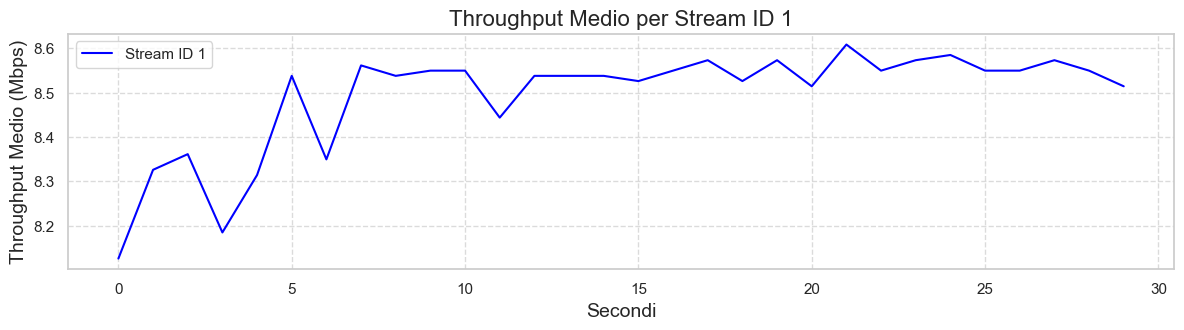

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Lista dei file CSV
csv_files = ['Data59ghz_far/output10_10_1.csv', 'Data59ghz_far/output10_10_2.csv', 'Data59ghz_far/output10_10_3.csv', 'Data59ghz_far/output10_10_4.csv', 'Data59ghz_far/output10_10_5.csv']

# Inizializza liste per i dati filtrati
filtered_data_list = []

# Leggi i file CSV, filtra e calcola il throughput
for file in csv_files:
    data = pd.read_csv(file, header=None)
    data.columns = ['timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_id', 'time_interval',
                'bytes', 'bitrate', 'jitter', 'lost_packets', 'sent_packets', 'loss_percentage', 'errors']
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m%d%H%M%S')
    data['throughput_mbps'] = (data['bytes'] * 8) / 1_000_000
    start_time = data['timestamp'].min()
    start_time_1 = start_time + pd.Timedelta(seconds=20)
    end_time = start_time + pd.Timedelta(seconds=50)
    filtered_data = data[(data['timestamp'] >= start_time_1) & (data['timestamp'] < end_time)].copy()  # Usa .copy()
    filtered_data_list.append(filtered_data)

# Calcola la media del throughput per ciascun secondo per ogni stream ID
mean_throughput_1 = []
#mean_throughput_2 = []
for second in range(30):
    second_data_1 = []
    #second_data_2 = []
    for filtered_data in filtered_data_list:
        timestamp_second = start_time + pd.Timedelta(seconds=second + 20)  # Aggiungi i 25 secondi di offset
        stream_id_1 = filtered_data[(filtered_data['flow_id'] == 1) & (filtered_data['timestamp'].dt.floor('s') == timestamp_second)]
        #stream_id_2 = filtered_data[(filtered_data['flow_id'] == 2) & (filtered_data['timestamp'].dt.floor('s') == timestamp_second)]
        if not stream_id_1.empty:
            second_data_1.append(stream_id_1['throughput_mbps'].mean())
        #if not stream_id_2.empty:
            #second_data_2.append(stream_id_2['throughput_mbps'].mean())
    mean_throughput_1.append(sum(second_data_1) / len(second_data_1) if second_data_1 else 0)
    #mean_throughput_2.append(sum(second_data_2) / len(second_data_2) if second_data_2 else 0)

# Calcola la media e la varianza del throughput per ciascun stream ID
throughput_avg_1 = sum(mean_throughput_1) / len(mean_throughput_1)
throughput_var_1 = math.sqrt(sum((x - throughput_avg_1) ** 2 for x in mean_throughput_1) / len(mean_throughput_1))

#throughput_avg_2 = sum(mean_throughput_2) / len(mean_throughput_2)
#throughput_var_2 = math.sqrt(sum((x - throughput_avg_2) ** 2 for x in mean_throughput_2) / len(mean_throughput_2))

# Print overall results
print(f'Throughput Medio Totale per Stream ID 1: {throughput_avg_1:.2f} Mbps')
print(f'Varianza Totale per Stream ID 1: {throughput_var_1:.5f} Mbps')
#print(f'Throughput Medio Totale per Stream ID 2: {throughput_avg_2:.2f} Mbps')
#print(f'Varianza Totale per Stream ID 2: {throughput_var_2:.5f} Mbps')

# Plot del throughput medio per stream ID 1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(range(30), mean_throughput_1, linestyle='-', color='blue', markersize=8, label='Stream ID 1')
plt.title(f'Throughput Medio per Stream ID 1', fontsize=16)
plt.xlabel('Secondi', fontsize=14)
plt.ylabel('Throughput Medio (Mbps)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()
